# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[48 -1  8]
 [19 14  2]
 [ 1 22 29]
 [11  5 18]
 [23 17  6]]
Simplices
 [[21  2 22]
 [ 6  3 10]
 [13  3  6]
 [ 5 29 17]
 [ 5 25  6]]
Points
 [[[0.68888513 0.99979391]
  [0.83405606 0.61866534]
  [0.9575414  0.36737112]]

 [[0.16583931 0.49293605]
  [0.48063359 0.24498545]
  [0.38947125 0.54849852]]

 [[0.19475839 0.18726862]
  [0.48063359 0.24498545]
  [0.16583931 0.49293605]]

 [[0.08251862 0.92156303]
  [0.32877719 0.90430511]
  [0.08424553 0.99309785]]

 [[0.08251862 0.92156303]
  [0.0336066  0.32283712]
  [0.16583931 0.49293605]]]


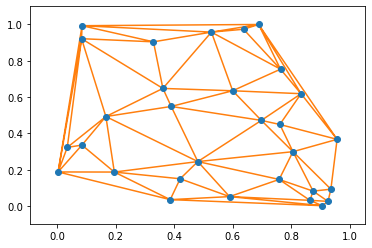

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

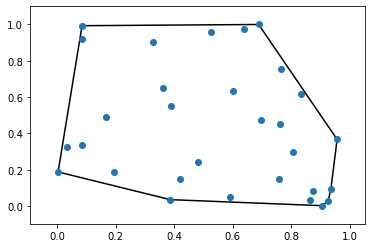

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

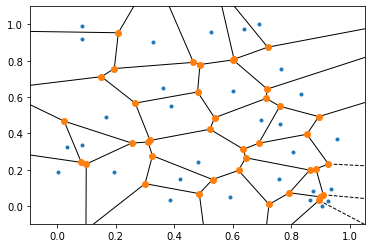

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.59996166 0.63485838]
 [0.92641591 0.02580471]
 [0.83405606 0.61866534]
 [0.48063359 0.24498545]
 [0.52721297 0.95769773]
 [0.08251862 0.92156303]
 [0.16583931 0.49293605]
 [0.08389788 0.33586906]
 [0.75906557 0.14665047]
 [0.00222913 0.18782725]
 [0.38947125 0.54849852]
 [0.69819692 0.4716486 ]
 [0.76375419 0.75365297]
 [0.19475839 0.18726862]
 [0.6371074  0.97349239]
 [0.90631665 0.00212751]
 [0.80642087 0.29943008]
 [0.08424553 0.99309785]
 [0.58934799 0.05202799]
 [0.42016447 0.15026163]
 [0.87535511 0.08220073]
 [0.68888513 0.99979391]
 [0.9575414  0.36737112]
 [0.36102116 0.64777283]
 [0.38612123 0.03541755]
 [0.0336066  0.32283712]
 [0.93625799 0.09300146]
 [0.86436533 0.03161018]
 [0.76143993 0.44921807]
 [0.32877719 0.90430511]]


In [8]:
%%timeit

tree.query((0.5,0.5))

28.6 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

544 µs ± 3.81 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

4.14 ms ± 29.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

896 µs ± 8.25 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.006329035178114007, 3440)
(0.006329035178114007, 3440)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

38.4 µs ± 351 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

31.8 µs ± 454 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

951 µs ± 5.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

35.5 µs ± 854 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
